# Universidad Nacional Abierta y a Distancia UNAD

## Programa Analisis de Datos

## Estudiante Edwin Porras Molina

### Pasos para realizar la actividad de acuerdo con la guia de aprendizaje

* 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
* 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
* 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
* 4. Entrenar el modelo configurando los diferentes hiperparámetros.
* 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
* 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
* 7. Interpretar, analizar y documentar los resultados obtenidos.
* 8. Cargar en GitHub los códigos de los modelos diseñados https://github.com/

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [ ]:
#### Se Cargan las librerias necesarias

In [84]:
# 📦 Carga de librerías necesarias para análisis, visualización y modelado

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización estática
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización interactiva (2D y 3D)
import plotly.express as px
import plotly.graph_objects as go

# Preprocesamiento y modelo K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Métricas de evaluación de clustering
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# Configuración para evitar advertencias
import warnings
warnings.filterwarnings('ignore')


In [30]:
# 📥 Carga del dataset desde archivo CSV
ruta_archivo = r'C:/Users/user/OneDrive - ALCALDÍA DISTRITAL DE BARRANQUILLA/Documentos/Estudios/UNAD/202501/Analisis de Datos/T4/Mall_Customers.csv'

try:
    datos = pd.read_csv(ruta_archivo)
    print("✅ Datos cargados correctamente.")
    print(f"📄 Filas: {datos.shape[0]} | Columnas: {datos.shape[1]}")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo. Verifica la ruta especificada.")
except Exception as e:
    print(f"⚠️ Se produjo un error al cargar el archivo: {e}")


✅ Datos cargados correctamente.
📄 Filas: 200 | Columnas: 5


In [33]:
# 👁️ Vista preliminar de los primeros registros del dataset
print("🔍 Mostrando las primeras 40 filas del dataset:")

datos.head(10)

🔍 Mostrando las primeras 40 filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [54]:
import pandas as pd

# Crear tabla descriptiva de las columnas
descripcion_columnas = pd.DataFrame({
    'Columna Original': ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    'Nueva en Español': ['ID_Cliente', 'Genero', 'Edad', 'Ingreso_Anual_kUSD', 'Puntaje_Gasto_1_100'],
    'Descripción': [
        'Identificador único del cliente',
        'Género del cliente (Masculino o Femenino)',
        'Edad del cliente en años',
        'Ingreso anual en miles de dólares',
        'Puntuación del nivel de gasto asignado por el centro comercial (1 a 100)'
    ]
})

# Mostrar la tabla
print("📘 Tabla descriptiva de columnas:\n")
print(descripcion_columnas.to_string(index=False))

📘 Tabla descriptiva de columnas:

      Columna Original    Nueva en Español                                                              Descripción
            CustomerID          ID_Cliente                                          Identificador único del cliente
                Gender              Genero                                Género del cliente (Masculino o Femenino)
                   Age                Edad                                                 Edad del cliente en años
    Annual Income (k$)  Ingreso_Anual_kUSD                                        Ingreso anual en miles de dólares
Spending Score (1-100) Puntaje_Gasto_1_100 Puntuación del nivel de gasto asignado por el centro comercial (1 a 100)


In [55]:
# Se realiza la descripción de los datos
print("📌 Descripción estadística de las variables numéricas:")
Datos.describe().T

📌 Descripción estadística de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


🔎 Conteo de valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


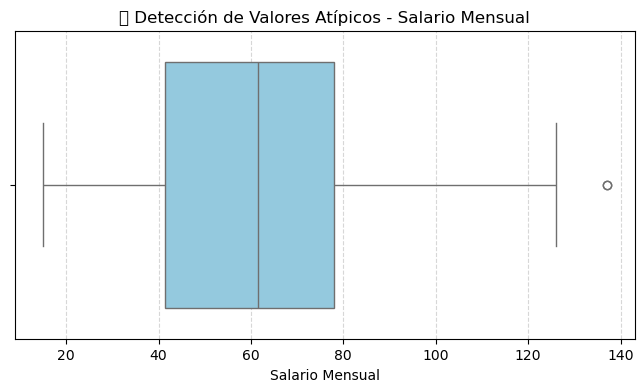

In [56]:
# 🕳️ Verificación de datos faltantes
print("🔎 Conteo de valores faltantes por columna:")
print(datos.isnull().sum())

# 📦 Detección visual de valores atípicos en Salario Mensual
plt.figure(figsize=(8, 4))
sns.boxplot(x=datos['Annual Income (k$)'], color='skyblue')
plt.title('🎯 Detección de Valores Atípicos - Salario Mensual', fontsize=12)
plt.xlabel('Salario Mensual')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [57]:
# 🔎 Revisión de posibles valores incorrectos (valores cero) en variables clave

variables_a_verificar = {
    'Age': 'Edad',
    'Annual Income (k$)': 'Salario Anual (k$)',
    'Spending Score (1-100)': 'Puntaje de Gasto (1-100)'
}

for columna, nombre_amigable in variables_a_verificar.items():
    cantidad_ceros = (datos[columna] == 0).sum()
    print(f"📌 Registros con valor 0 en {nombre_amigable}: {cantidad_ceros}")


📌 Registros con valor 0 en Edad: 0
📌 Registros con valor 0 en Salario Anual (k$): 0
📌 Registros con valor 0 en Puntaje de Gasto (1-100): 0


In [58]:
# 🔄 Imputación: Reemplazo de ceros por el promedio de la columna Salario_Mensual

columna = 'Annual Income (k$)'
media_sin_ceros = datos[datos[columna] != 0][columna].mean()

cantidad_ceros = (datos[columna] == 0).sum()
print(f"📌 Reemplazando {cantidad_ceros} valores cero en '{columna}' por la media: {media_sin_ceros:.2f}")

datos[columna] = datos[columna].replace(0, media_sin_ceros)

📌 Reemplazando 0 valores cero en 'Annual Income (k$)' por la media: 60.56


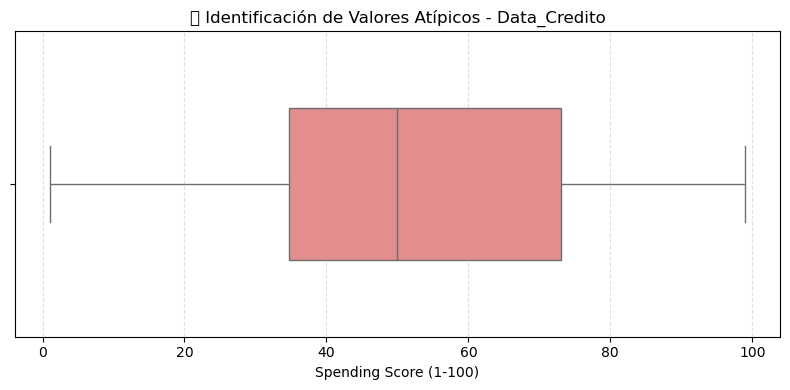

In [59]:
# 📦 Visualización de valores atípicos con boxplot

plt.figure(figsize=(8, 4))
sns.boxplot(x=datos['Spending Score (1-100)'], color='lightcoral', width=0.5)
plt.title('🎯 Identificación de Valores Atípicos - Data_Credito', fontsize=12)
plt.xlabel('Spending Score (1-100)')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [60]:
# 🧮 Detección cuantitativa de outliers usando el método IQR

col = 'Spending Score (1-100)'
Q1 = datos[col].quantile(0.25)
Q3 = datos[col].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = datos[(datos[col] < limite_inferior) | (datos[col] > limite_superior)]

print(f"🚨 Se encontraron {outliers.shape[0]} valores atípicos en '{col}'.")


🚨 Se encontraron 0 valores atípicos en 'Spending Score (1-100)'.


In [61]:
# 📌 Definición de límites para valores válidos
limite_inferior = 0
limite_superior = 100

# 📊 Identificación de datos fuera de los límites
atipicos = Datos[(Datos['Spending Score (1-100)'] < limite_inferior) | (Datos['Spending Score (1-100)'] > limite_superior)]

# 🔢 Conteo de valores atípicos
total_atipicos = atipicos.shape[0]

# 🖨️ Resultado
print(f"El total de datos atípicos en 'Spending Score (1-100)' fuera del rango [{limite_inferior}, {limite_superior}] es: {total_atipicos}")


El total de datos atípicos en 'Spending Score (1-100)' fuera del rango [0, 100] es: 0


In [62]:
# Definir límites válidos para la puntuación de gasto
limite_inferior = 0
limite_superior = 100

# Guardar tamaño original
filas_antes = Datos.shape[0]

# Filtrar valores dentro del rango permitido
Datos = Datos[(Datos['Spending Score (1-100)'] > limite_inferior) & (Datos['Spending Score (1-100)'] < limite_superior)]

# Guardar tamaño después del filtro
filas_despues = Datos.shape[0]

# Mostrar resultado
print(f"✔️ Filtrado de datos atípicos completado.")
print(f"Se eliminaron {filas_antes - filas_despues} filas fuera del rango ({limite_inferior}, {limite_superior}).")


✔️ Filtrado de datos atípicos completado.
Se eliminaron 0 filas fuera del rango (0, 100).


In [65]:
#Revisión del tipo de datos y datos faltantes

Datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

A continuación se detallan las características de interes para el agrupamiento:

* El Salario Anual
* El Puntaje de Gasto
* La Edad

In [68]:
# 🧾 Lista de columnas requeridas
columnas_modelo = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# ✅ Verificar si todas existen en el DataFrame
columnas_faltantes = [col for col in columnas_modelo if col not in Datos.columns]

if columnas_faltantes:
    print(f"⚠️ Las siguientes columnas no existen en el DataFrame: {columnas_faltantes}")
else:
    Datos = Datos[columnas_modelo]
    print(f"✔️ Columnas filtradas exitosamente: {columnas_modelo}")


✔️ Columnas filtradas exitosamente: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [73]:
# 🔍 Revisión detallada de las variables objetivo

print("📌 Primeras 10 observaciones de las variables objetivo:")
display(Datos.head(10))  # Usa display() si estás en Jupyter para una visualización más limpia

print("\n🔢 Tipos de datos de las variables:")
print(Datos.dtypes)

print("\n🔄 Valores únicos por variable:")
print(Datos.nunique())


📌 Primeras 10 observaciones de las variables objetivo:


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72



🔢 Tipos de datos de las variables:
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

🔄 Valores únicos por variable:
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64


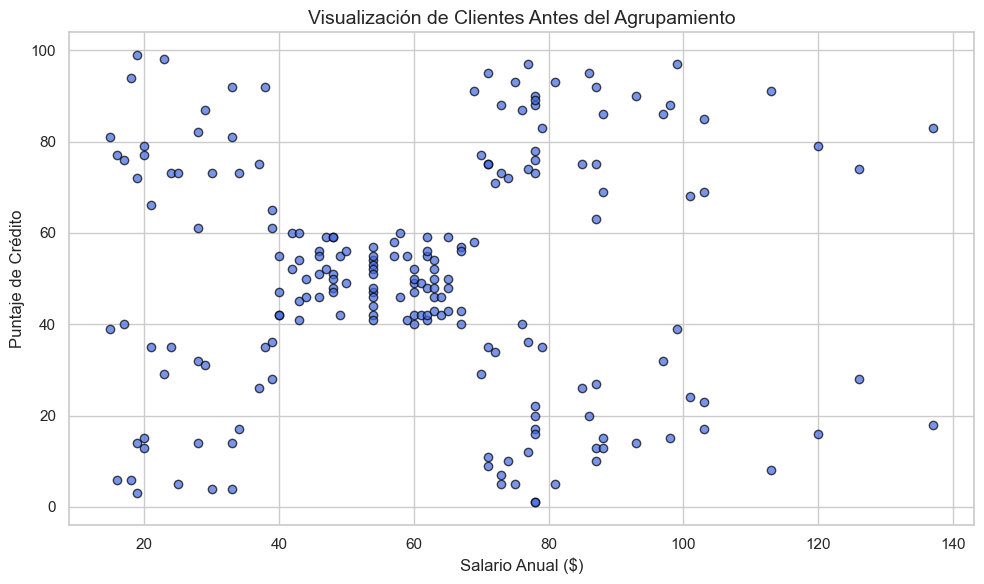

In [75]:
# Estilo visual (opcional pero recomendado)
sns.set(style="whitegrid")

# 📊 Gráfico de dispersión antes del agrupamiento
plt.figure(figsize=(10, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], color='royalblue', edgecolor='black', alpha=0.7)

# 🏷️ Etiquetas y título
plt.xlabel('Salario Anual ($)', fontsize=12)
plt.ylabel('Puntaje de Crédito', fontsize=12)
plt.title('Visualización de Clientes Antes del Agrupamiento', fontsize=14)

# 🧭 Rejilla para facilitar lectura
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 4. Entrenar el modelo configurando los diferentes hiperparámetros

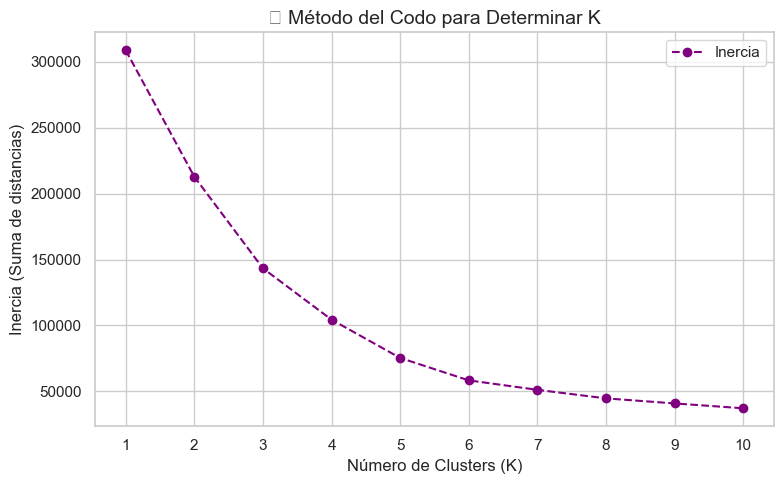

In [79]:
# ✅ Asegurar que los datos son numéricos
Datos_numericos = Datos.select_dtypes(include=['number'])

# 🔢 Rango de posibles valores de K
Nc = np.arange(1, 11)  # Se usa numpy para mejorar eficiencia

# 📉 Calcular la inercia (suma de distancias al centro del cluster)
inercia = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(Datos_numericos).inertia_ for k in Nc]

# 🎨 Estilo de Seaborn
sns.set_theme(style="whitegrid")

# 📊 Gráfico de la inercia (técnica del codo)
plt.figure(figsize=(8, 5))
plt.plot(Nc, inercia, marker='o', linestyle='--', color='purple', label="Inercia")
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia (Suma de distancias)', fontsize=12)
plt.title('📌 Método del Codo para Determinar K', fontsize=14)
plt.xticks(Nc)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
# 🚀 Creación y entrenamiento del modelo de agrupamiento con K=5
modelo = KMeans(n_clusters=5, random_state=0, n_init=10)
modelo.fit(Datos)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [83]:
# 🏷️ Agregar la columna "Grupo" para identificar el número de agrupamiento
Datos["Grupo"] = modelo.labels_

# 🖥️ Mostrar el DataFrame con los grupos asignados
print(Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      0
1     21                  15                      81      3
2     20                  16                       6      0
3     23                  16                      77      3
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      4
197   32                 126                      74      1
198   32                 137                      18      4
199   30                 137                      83      1

[200 rows x 4 columns]


### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [85]:
# 📊 Desempeño del modelo con métricas de evaluación
observaciones = len(Datos)
X = Datos.drop(columns=['Grupo'])  # Sintaxis más clara
clusters = Datos['Grupo']

# 🔍 Cálculo de métricas de evaluación
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# 📋 Creación de tabla con resultados
table_data = [
    ["Número de Observaciones", observaciones],
    ["Coeficiente Silhouette", f"{sil_score:.4f}"],  # Formato más legible
    ["Índice Calinski-Harabasz", f"{calinski_score:.2f}"],
    ["Índice Davies-Bouldin", f"{davies_score:.4f}"]
]

# 📢 Imprimir tabla en formato visualmente agradable
print(tabulate(table_data, headers=["Métrica", "Valor"], tablefmt='pretty'))

+--------------------------+--------+
|         Métrica          | Valor  |
+--------------------------+--------+
| Número de Observaciones  |  200   |
|  Coeficiente Silhouette  | 0.4443 |
| Índice Calinski-Harabasz | 151.04 |
|  Índice Davies-Bouldin   | 0.8219 |
+--------------------------+--------+


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

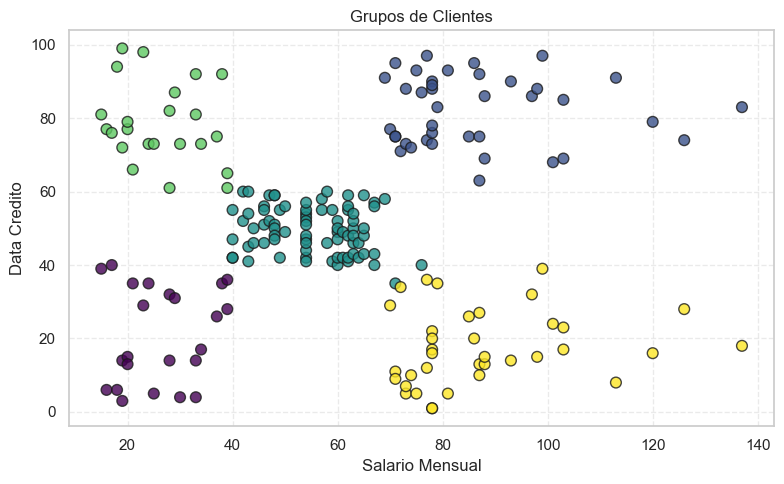

In [102]:
# Gráfico de dispersión de clientes segmentados por grupo
plt.figure(figsize=(8, 5))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis', s=60,edgecolor='k',
    alpha=0.8)
plt.xlabel('Salario Anual')
plt.ylabel('Data Credito')
plt.title('Grupos de Clientes')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 7. Interpretar, analizar y documentar los resultados obtenidos


##### Se puede describir el desempeño del modelo de la siguiente manera

* Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente 0.4443, aunque no se acerca a 1, todavía indica una buena cantidad de separación entre los grupos. Sugiere que los grupos son algo distintos, pero puede haber ligeras superposiciones entre ellos. En general, una puntuación más cercana a 1 sería ideal
* Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 151.04, que es aceptablemente alta, lo que indica que los clústeres están bien definidos. Una puntuación más alta en esta métrica generalmente indica mejores definiciones de clúster, lo que implica que nuestra agrupación en clústeres ha logrado encontrar una estructura sustancial en los datos.
* Indice Davies Bouldin: La puntuación de Davies Bouldin de 0.8219 es una puntuación razonable, lo que indica un nivel moderado de similitud entre cada grupo y el más similar. Una puntuación más baja es generalmente mejor, ya que indica menos similitud entre los clústeres y, por lo tanto, nuestra puntuación aquí sugiere una separación decente entre los grupos¶

### 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/